# Topic specific LIWC analysis:
we wanted to capture the sentiment differences between depression and control groups. For that, we employed linear regression analysis with the features derived from LIWC attributes as independent variables and an overall sentiment polarity difference between groups as dependent variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(rc={"figure.figsize":(20, 6)})

In [2]:
# this data contains the sentiment labels, topic numbers and liwc attribute scores.
data = pd.read_csv("LIWC_Sentiment_topics.csv")
data.shape

(559603, 129)

In [3]:
data.head(2)

,ids,clean_text,topic,probs,sentiments,users,created_utc,negative,neutral,positive,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,1950591,Just rescued an Australian Cattle Dog Blue Hee...,0,0.539362,neutral,clinical,1361727119,0.043026,0.809415,0.147559,...,0.0,0.0,0,0,0,0,0,0,0,0
1,1950591,I see where you re coming from and I m judging...,1937,0.000000,neutral,clinical,1369051472,0.147034,0.504005,0.348961,...,0.0,0.0,0,0,0,0,0,0,0,0


In [4]:
# these columns have only value 0 except ids and clean text. We do not need these columns
data.drop(columns = ['ids','probs','created_utc','negative','neutral','positive',
                    'Segment','AllPunc', 'Period', 'Comma', 'QMark', 'Exclam',
       'Apostro', 'OtherP', 'Emoji','clean_text'],axis =1,inplace = True)

## We have 13 topics only present in one group with very low frequency so we are removing these topics from whole data

In [5]:
not_common_topics = [2339, 4042, 4082, 4150, 4154, 4161, 4162, 4170, 4171, 4178, 4179, 4181, 4184]
data = data[~data['topic'].isin(not_common_topics)].reset_index(drop=True)

In [6]:
data.topic.nunique()

4174

## We want our data to look like as: aggregated score of each LIWC attribute for both groups topic vise

# calculation for the independent features in two steps:
- First, we calculated mean aggregated attribute scores for both groups topic-wise
- second,we calculated the difference between hese scores

In [7]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Exclude 'topic' ,'users, and 'sentiments' columns
columns_to_exclude = ['topic', 'sentiments','users']
numeric_columns = [col for col in numeric_columns if col not in columns_to_exclude]

# Create aggregation dictionary
agg_dict = {col: 'mean' for col in numeric_columns}

In [8]:
# Grouping by 'topic' and 'user' and aggregating using the dictionary
aggregated_data = data.groupby(['topic', 'users']).agg(agg_dict).reset_index()


In [9]:
aggregated_data.head() # data for step one

,topic,users,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,...,feeling,time,focuspast,focuspresent,focusfuture,Conversation,netspeak,assent,nonflu,filler
0,-1,clinical,4.477500,24.762650,44.678500,47.400650,22.597725,4.477500,8.885525,81.770100,...,0.000000,2.891125,2.787050,6.667625,1.096650,1.723600,1.556925,0.187500,0.166675,0.000000
1,-1,control,4.433202,25.881758,45.596974,44.552250,23.000324,4.433202,10.057701,79.109971,...,0.000000,3.091257,2.618998,6.988694,0.798094,1.426228,1.354194,0.317613,0.000000,0.072033
2,0,clinical,33.858337,43.039461,47.291797,44.486275,44.177106,33.858337,11.995072,80.755634,...,0.362513,3.415439,3.598672,4.478848,0.858551,1.245388,0.767023,0.278435,0.206897,0.089647
3,0,control,19.581620,49.740810,49.625985,41.044502,40.902971,19.581620,11.809907,78.135357,...,0.527884,3.495067,3.148992,4.483418,0.699811,1.634966,1.225865,0.252225,0.177445,0.087614
4,1,clinical,66.207647,25.479973,59.251206,47.805805,38.393739,66.207647,11.876399,91.192560,...,0.785741,4.753324,3.963452,3.864780,1.687600,1.249060,0.873914,0.300133,0.089575,0.034796


## for step 2 calculation:

In [10]:
# here we are creating two subset of aggregated data based on user group.
agg_con = aggregated_data[aggregated_data['users']=='control'].reset_index(drop=True)
agg_cli = aggregated_data[aggregated_data['users']=='clinical'].reset_index(drop=True)

In [11]:
df_diff = agg_cli.drop(columns=['topic', 'users'],axis = 1) - agg_con.drop(columns=['topic', 'users'],axis = 1)

df_diff['topic'] = agg_cli['topic']

df_diff.head() # this dataframe contains our final independent features. 


,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,...,time,focuspast,focuspresent,focusfuture,Conversation,netspeak,assent,nonflu,filler,topic
0,0.044298,-1.119108,-0.918474,2.848400,-0.402599,0.044298,-1.172176,2.660129,2.414452,2.080595,...,-0.200132,0.168052,-0.321069,0.298556,0.297372,0.202731,-0.130113,0.166675,-0.072033,-1
1,14.276717,-6.701349,-2.334188,3.441773,3.274136,14.276717,0.185165,2.620277,3.134024,4.484158,...,-0.079628,0.449679,-0.004570,0.158740,-0.389578,-0.458842,0.026210,0.029453,0.002033,0
2,27.430466,-0.971463,-3.043935,2.657737,2.073403,27.430466,0.853930,0.058211,-0.599721,-0.026530,...,0.159848,-0.171541,-0.252670,-0.295474,-0.682833,-0.656113,0.018415,-0.007378,-0.003231,1
3,3.478830,-8.434349,-1.782082,11.046483,2.454724,3.478830,-0.376343,9.112855,7.355186,7.657289,...,0.514827,0.800552,0.248917,-0.060333,0.030019,-0.215848,0.064947,0.084122,0.103402,2
4,9.016063,0.419580,-7.193020,5.481277,-0.610968,9.016063,1.478752,-0.823707,-0.736111,0.101394,...,0.503815,0.076449,-1.141311,-0.286436,-0.340334,-0.357659,0.043186,0.010889,0.007067,3


# Calcuation for dependent variable i.e. y: the sentiment difference between depression and control groups per topic, is calculated as the net sentiment score difference 

In [12]:
# Calculate sentiment percentages
sentiments_percentage = data.groupby(['topic', 'users'])['sentiments'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
sentiments_percentage.head(2)

,topic,users,sentiments,percentage
0,-1,clinical,neutral,93.25
1,-1,clinical,positive,3.50


In [13]:
# Pivot the data to get sentiments for users side by side
pivot_df = sentiments_percentage.pivot_table(index='topic', columns=['users', 
                                                                     'sentiments'], values='percentage',aggfunc='sum')

# Flatten the MultiIndex columns for easier referencing
pivot_df.columns = ['_'.join(map(str, col)).strip() for col in pivot_df.columns.values]

pivot_df.fillna(0,inplace = True)
pivot_df.reset_index(inplace=True)

pivot_df.head()


,topic,clinical_negative,clinical_neutral,clinical_positive,control_negative,control_neutral,control_positive
0,-1,3.250000,93.250000,3.500000,2.161100,97.053045,0.785855
1,0,26.010218,45.982350,28.007431,23.901653,56.952842,19.145506
2,1,46.415295,39.192777,14.391928,31.275168,55.302013,13.422819
3,2,18.154762,61.607143,20.238095,9.836957,73.369565,16.793478
4,3,42.462845,49.256900,8.280255,38.650738,51.791989,9.557273


In [14]:
# Calculate the difference in sentiment percentages
pivot_df['diff_cli'] =pivot_df['clinical_positive'] -pivot_df['clinical_negative']
pivot_df['diff_con'] =pivot_df['control_positive'] -pivot_df['control_negative']

# Extract the relevant columns
result_df = pivot_df[['topic', 'diff_cli', 'diff_con']]
result_df.head()

,topic,diff_cli,diff_con
0,-1,0.250000,-1.375246
1,0,1.997213,-4.756147
2,1,-32.023367,-17.852349
3,2,2.083333,6.956522
4,3,-34.182590,-29.093465


In [15]:
result_df['sen_diff'] = result_df['diff_cli'] - result_df['diff_con']
result_df.head() # this dataframe contains the dependent variable y 'sen_diff'

<ipython-input-15-f67216d12f64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['sen_diff'] = result_df['diff_cli'] - result_df['diff_con']


,topic,diff_cli,diff_con,sen_diff
0,-1,0.250000,-1.375246,1.625246
1,0,1.997213,-4.756147,6.753360
2,1,-32.023367,-17.852349,-14.171018
3,2,2.083333,6.956522,-4.873188
4,3,-34.182590,-29.093465,-5.089126


# making data suitable for linear regression:

In [16]:
final_df_ = df_diff.merge(result_df,on='topic')

In [17]:
final_df_.head()

,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,...,focusfuture,Conversation,netspeak,assent,nonflu,filler,topic,diff_cli,diff_con,sen_diff
0,0.044298,-1.119108,-0.918474,2.848400,-0.402599,0.044298,-1.172176,2.660129,2.414452,2.080595,...,0.298556,0.297372,0.202731,-0.130113,0.166675,-0.072033,-1,0.250000,-1.375246,1.625246
1,14.276717,-6.701349,-2.334188,3.441773,3.274136,14.276717,0.185165,2.620277,3.134024,4.484158,...,0.158740,-0.389578,-0.458842,0.026210,0.029453,0.002033,0,1.997213,-4.756147,6.753360
2,27.430466,-0.971463,-3.043935,2.657737,2.073403,27.430466,0.853930,0.058211,-0.599721,-0.026530,...,-0.295474,-0.682833,-0.656113,0.018415,-0.007378,-0.003231,1,-32.023367,-17.852349,-14.171018
3,3.478830,-8.434349,-1.782082,11.046483,2.454724,3.478830,-0.376343,9.112855,7.355186,7.657289,...,-0.060333,0.030019,-0.215848,0.064947,0.084122,0.103402,2,2.083333,6.956522,-4.873188
4,9.016063,0.419580,-7.193020,5.481277,-0.610968,9.016063,1.478752,-0.823707,-0.736111,0.101394,...,-0.286436,-0.340334,-0.357659,0.043186,0.010889,0.007067,3,-34.182590,-29.093465,-5.089126


In [18]:
# 63 features we selected after removing the correlated attributes:
features = ['Analytic', 'Clout', 'Authentic','WC','Tone',
            'i', 'we', 'you', 'shehe','they', 'ipron','auxverb','negate',
            'Drives',
           'insight', 'cause', 'discrep', 'tentat', 'certitude','differ','memory','allnone',
            'emo_anx', 'emo_anger','emo_sad', 'swear', 'emo_pos','emo_neg',
           'socbehav','polite','moral','comm','conflict',
            'family', 'friend','female','male',
           'Culture','relig',
           'Lifestyle',
           'illness', 'wellness', 'mental', 'substances', 'sexual', 'food','death',
            'need', 'want', 'acquire', 'lack', 'fulfill', 'fatigue',
           'reward', 'risk','curiosity', 'allure', 
            'Perception','feeling',
          'focuspast','focuspresent', 'focusfuture', 
            'Conversation']

In [19]:
# Linear regression with OLS method
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

y = final_df_['sen_diff']
X = final_df_[features]
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               sen_diff   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     23.63
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          3.36e-226
Time:                        12:54:46   Log-Likelihood:                -17464.
No. Observations:                4174   AIC:                         3.506e+04
Df Residuals:                    4110   BIC:                         3.546e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9998      0.248     -4.037   

In [20]:

# Extract relevant information
rsquared = model.rsquared
f_statistic = model.fvalue
f_p_value = model.f_pvalue

# Print the information
print(f"The model explained {rsquared * 100:.1f}% of the variability.")
print(f"R-squared = {rsquared:.2f}")
print(f"F-statistic = {f_statistic:.2f}")
print(f"P-value = {f_p_value:.2f}")

The model explained 26.6% of the variability.
R-squared = 0.27
F-statistic = 23.63
P-value = 0.00


In [21]:
# Filter the summary for significant features only
significant_features = model.summary2().tables[1]['P>|t|'] < 0.05
significant_features_df = np.round(model.summary2().tables[1][significant_features],4).reset_index().rename(columns ={'index':'features'})
significant_features_df

,features,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
0,const,-0.9998,0.2477,-4.0365,0.0001,-1.4854,-0.5142
1,Clout,1.1090,0.4853,2.2852,0.0224,0.1575,2.0604
2,WC,-1.3876,0.2631,-5.2737,0.0000,-1.9035,-0.8718
3,Tone,7.2384,0.2873,25.1978,0.0000,6.6752,7.8016
4,i,0.8189,0.3766,2.1747,0.0297,0.0806,1.5572
5,shehe,-0.8896,0.3871,-2.2983,0.0216,-1.6484,-0.1307
6,negate,-0.8863,0.3039,-2.9162,0.0036,-1.4821,-0.2904
7,Drives,-0.6603,0.2980,-2.2156,0.0268,-1.2446,-0.0760
8,cause,-0.9897,0.2642,-3.7465,0.0002,-1.5076,-0.4718
9,discrep,-0.7955,0.3201,-2.4853,0.0130,-1.4231,-0.1680


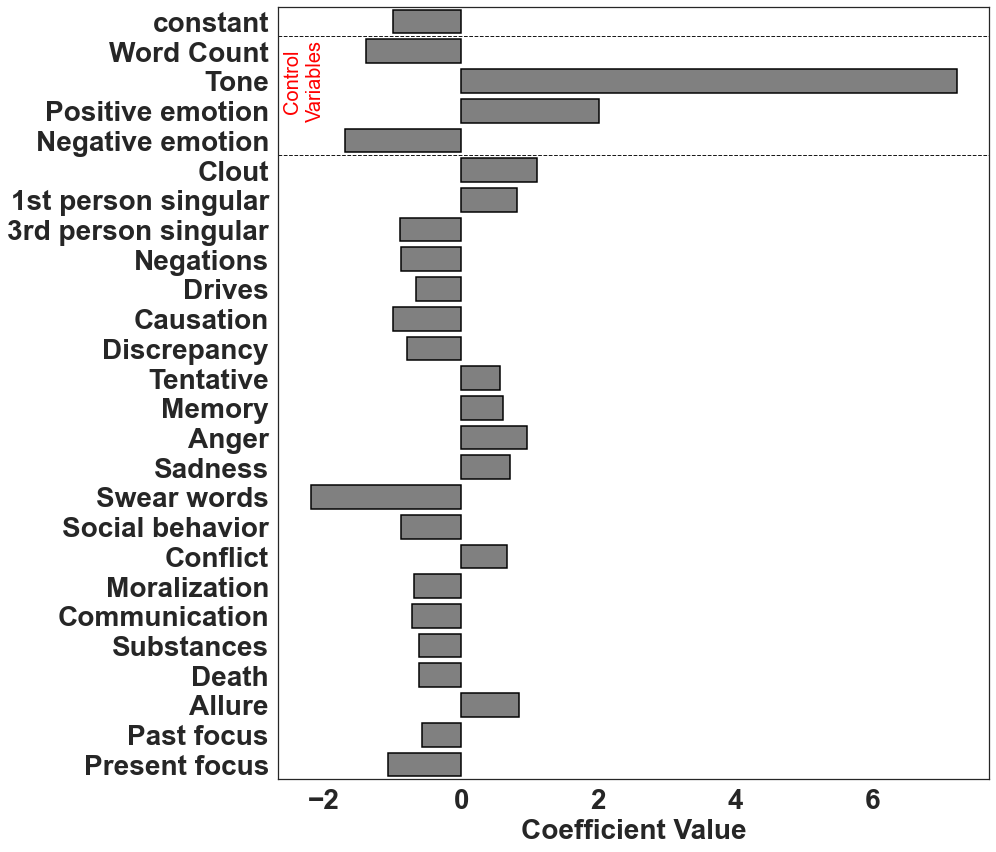

In [23]:
attributes = ["constant", "Word Count", "Tone", "Positive emotion", "Negative emotion","Clout", "1st person singular", "3rd person singular", 
              "Negations", "Drives", "Causation", "Discrepancy", "Tentative", "Memory",
              "Anger", "Sadness", "Swear words",
              "Social behavior", "Conflict", "Moralization", "Communication", "Substances",
              "Death", "Allure", "Past focus", "Present focus"]
coefficients = [-0.9998, -1.3876,7.2384,2.0170, -1.7006, 1.1090, 0.8189, -0.8896, -0.8863, -0.6603, -0.9897,
                -0.7955, 0.5659, 0.6089,  0.9660, 0.7130, -2.1978, -0.8867,
                0.6695, -0.6971, -0.7260, -0.6174, -0.6125, 0.8486, -0.5674, -1.0653]

# Create DataFrame
df = pd.DataFrame({"Attribute": attributes, "Coefficient": coefficients})

# Plot setup
sns.set_style('white')
sns.set_context("notebook")
plt.figure(figsize=(14, 12))
barplot = sns.barplot(x="Coefficient", y="Attribute", data=df, color="gray", linewidth=1.5, edgecolor=".0")
plt.axhline(y= df[df['Attribute'] == "constant"].index[0] + 1 - 0.5, color='k', linestyle='--', linewidth=1)
# Adding horizontal dashed lines to separate sections
control_variables_end = df[df['Attribute'] == "Negative emotion"].index[0] + 1
plt.axhline(y=control_variables_end - 0.5, color='k', linestyle='--', linewidth=1)


# Annotations with curly braces
plt.text(x=min(df['Coefficient']) - 0.1, y=2, s='Control\nVariables', ha='center', va='center', fontsize=20, rotation=90, color='red')

plt.xlabel("Coefficient Value", fontsize=28, fontweight='bold')
plt.ylabel("", fontsize=28, fontweight='bold')
plt.xticks(fontsize=28, fontweight='bold')  # Set tick labels to be bold
plt.yticks(fontsize=28, fontweight='bold')

# Adjust layout and save
plt.tight_layout()
#plt.savefig("OLS_result_illustrations_final.pdf", format='pdf', transparent=True, bbox_inches="tight", pad_inches=0.1, dpi=300)

plt.show()
